# Task 3: Feature importance

In [7]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV, LinearRegression, Ridge
from scipy.stats import pearsonr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


## Load data

In [6]:
with open("./task3_feature-importance_data.pickle", "rb") as f:
    X, y = pickle.load(f)
print(X.shape)
print(y.shape)


(1000, 10)
(1000,)


## Fit model

In [20]:
model = make_pipeline(StandardScaler(), RidgeCV())
model.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv', RidgeCV(alphas=array([ 0.1,  1. , 10. ])))])

## Analyse correlations and model coefficients

In [4]:
correlations_r = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
correlations_p = [pearsonr(X[:, i], y)[1] for i in range(X.shape[1])]

In [30]:
df = pd.DataFrame({
        "coef": model["ridgecv"].coef_, 
        "correlation r": correlations_r, 
        "correlation p": correlations_p}, 
    index=[f"feature {i}" for i in range(X.shape[1])])
df

,coef,correlation r,correlation p
feature 0,-1.529528,-0.034627,2.739660e-01
feature 1,0.516905,0.009749,7.581588e-01
feature 2,59.958697,0.496610,2.160929e-63
feature 3,0.053120,0.049881,1.149366e-01
feature 4,68.390912,0.554580,1.019725e-81
feature 5,72.159892,0.577704,4.339895e-90
feature 6,-2.134884,-0.021040,5.063249e-01
feature 7,39.197821,-0.009722,7.588043e-01
feature 8,40.087218,0.024289,4.429447e-01
feature 9,1.915710,0.013164,6.775740e-01


In [31]:
# feature 7 and 8 are binary
np.unique(X[:,7]), np.unique(X[:,8])

(array([0., 1.]), array([0., 1.]))

In [32]:
# feature 7 and 8 are mutually exclusive
((X[:,7] == 1) & (X[:,8] == 1)).sum()

0

In [33]:
# feature 7 and 8 nearly cover the whole dataset!
((X[:,7] == 1) | (X[:,8] == 1)).sum() / X.shape[0]

0.99

## Tasks

Feature 7 and 8 seem to be important features for the model (with coefficients > 30!). However, taking a closer look, they are both binary, mutually exclusive, and nearly cover the whole dataset. Also they are barely correlated to the outcome by themselves. I would not expect them to both have such a high importance for the model and on top of that both positive! What is going on?

In [16]:
df = pd.DataFrame(X)


 calculating the correlation among the features to examine if there is a significant correlation between feature 7 and feature 8 with other features or not

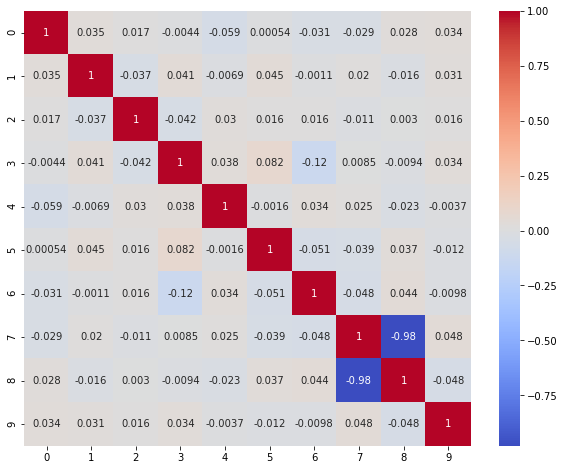

In [17]:
corrolation_matrix = df.corr()
plt.figure(figsize=(10,  8))  # Set the figure size
sns.heatmap(corrolation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

feature 7 and 8 have strong negative relationships and they are mutually exclusive. Mutual exclusivity refers to the situation where two events cannot both occur at the same time. let's assume that we want to predict the weight of people from some features. the features are ["is_male","is_famale","height","waist size","foot_size", and etc...]. "is_male" and "is_female" are mutually exclusive because a person cannot be male and female simultaneously. also, they have a strong negative correlation meaning once “is_male” gets a value the other should get the opposite value. By this example, it is clear that being a man can have a very strong effect on predicting people's weight as men are usually heavier than women. So it is logical that these two features have a great weight. this is what happening in our example.

Furthermore, Pearson calculates the linear correlation between feature 7 and output and just the same for feature 8. Therefore, maybe features 7 and 8 do not correlate linearly to effect output. 
Moreover, Ridge regression introduces a penalty term to the loss function, which is essentially a sum of the squared values of the coefficients associated with the features, including features 7 and 8. Due to the inclusion of lambda*((feature7)^2 + (feature8)^2) in the penalty term, the coefficients for these features could potentially be inflated, especially since they account for the entire dataset. Consequently, this could lead to a suppression of other weights within the model. 